In [1]:
 # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
csvpath1 = Path("whale_returns.csv")

whale_df = pd.read_csv(csvpath1, index_col = 'Date', parse_dates = True, infer_datetime_format=True)

# whale_df.T.isna().sum() - for getting nulls on rows

whale_df.isna().sum()

whale_df.dropna(inplace=True)

whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
csvpath2 = Path("algo_returns.csv")

algo_df = pd.read_csv(csvpath2, index_col = 'Date', parse_dates = True, infer_datetime_format=True)

algo_df.isna().sum()

algo_df.dropna(inplace=True)

algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [4]:
# help(whale_df.isnull)

In [4]:
csvpath3 = Path("sp_tsx_history.csv")

sp_df = pd.read_csv(csvpath3, index_col = 'Date', parse_dates = True, infer_datetime_format=True)

sp_df.dtypes

Close    object
dtype: object

In [5]:
sp_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [6]:
sp_df['Close'] = sp_df['Close'].str.replace('$','', regex=True)

sp_df['Close'] = sp_df['Close'].str.replace(',','', regex=True)

sp_df['Close'] = sp_df['Close'].astype('float')

sp_df.dtypes

Close    float64
dtype: object

In [7]:
sp_df.isna().sum()

Close    0
dtype: int64

In [8]:
sp_df.dropna(inplace=True)

sp_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [9]:
daily_returns = sp_df.pct_change()

daily_returns.dropna(inplace=True)

daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [11]:
# whale_port = pd.concat(map(pd.read_csv, [csvpath1, csvpath2,csvpath3]))

In [10]:
daily_returns.dropna(inplace=True)

daily_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [13]:
# whale_port

daily_returns.columns = ["TSX 60 Close"]

daily_returns.head()

,TSX 60 Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# whale_port.dropna(axis=0)

In [14]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([whale_df, algo_df, daily_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [18]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.1, 0.15, 0.1, 0.2, 0.15, 0.15, 0.15]

portfolio_returns = combined_df.dot(weights)
portfolio_returns

Date
2015-03-03   -0.003950
2015-03-04   -0.000133
2015-03-05    0.003301
2015-03-06   -0.008753
2015-03-09   -0.000659
                ...   
2019-04-25   -0.000847
2019-04-26    0.007085
2019-04-29    0.003290
2019-04-30   -0.002082
2019-05-01   -0.004941
Length: 1029, dtype: float64

<Axes: xlabel='Date'>

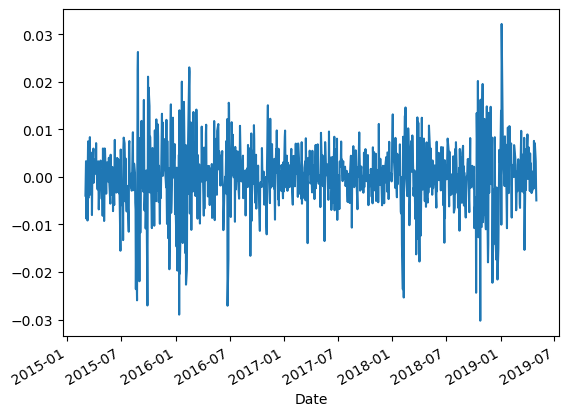

In [20]:
# Use the `plot` function to plot the daily portfolio returns
portfolio_returns.plot()

In [22]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

Date
2015-03-03   -0.003950
2015-03-04   -0.004083
2015-03-05   -0.000796
2015-03-06   -0.009541
2015-03-09   -0.010194
dtype: float64

<Axes: xlabel='Date'>

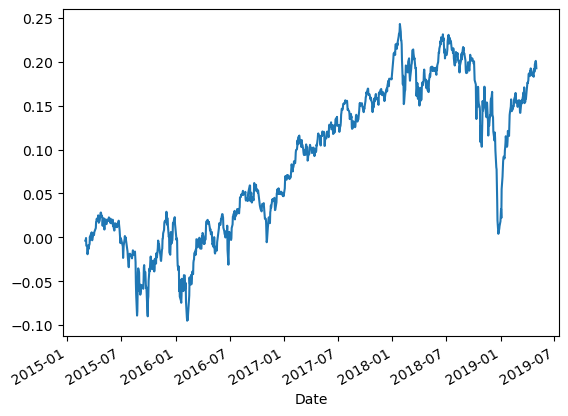

In [23]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns.plot()

<Axes: >

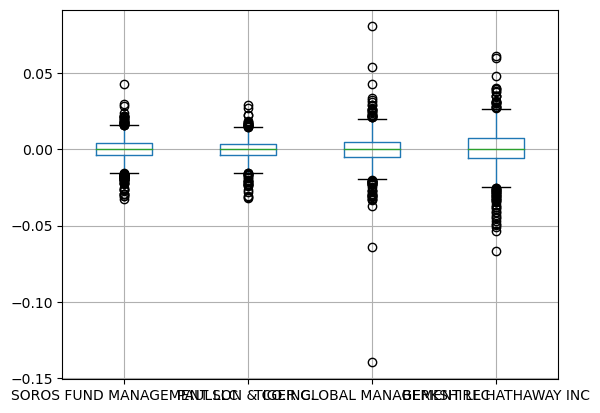

In [24]:
whale_df.boxplot() #subplots_adjust(bottom=0.001)

<Axes: >

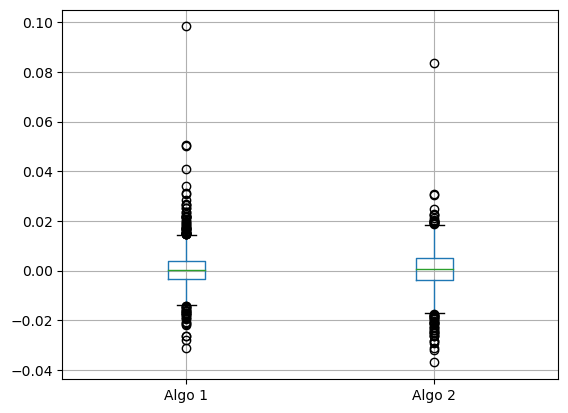

In [25]:
algo_df.boxplot()

<Axes: >

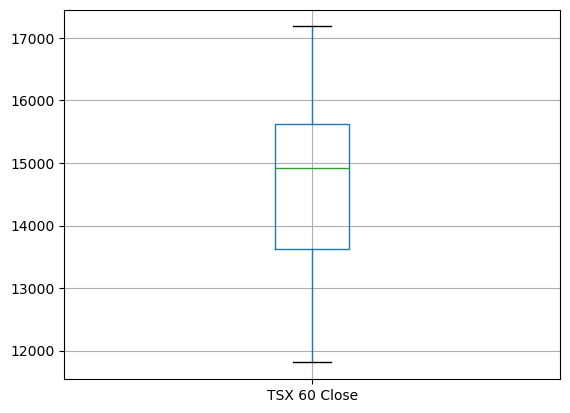

In [26]:
sp_df.boxplot()

In [27]:
np.std(combined_df)

SOROS FUND MANAGEMENT LLC      0.007824
PAULSON & CO.INC.              0.006979
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012819
Algo 1                         0.007585
Algo 2                         0.008322
TSX 60 Close                   0.007031
dtype: float64

In [28]:
np.std(sp_df)

TSX 60 Close    1327.972234
dtype: float64

In [30]:
sp_return = sp_df.pct_change()

sp_std = np.std(sp_return)

print(sp_std)

"""
The riskiest portfolio is Berkshire Hathaway

All portfolios are riskier than TSX 60

""" 

TSX 60 Close    0.006636
dtype: float64


'\nThe riskiest portfolio is Berkshire Hathaway\n\nAll portfolios are riskier than TSX 60\n\n'

In [27]:
# Plot a rolling annualized std dev of all portfolio closing prices
annualized_df = combined_df.rolling(window=252).std()

annualized_df.dropna(inplace=True)

annualized_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Close
Date,,,,,,,
2016-03-08,0.008968,0.006518,0.009574,0.015108,0.009844,0.010129,954.322880
2016-03-09,0.008976,0.006541,0.009578,0.015112,0.009842,0.010140,951.972497
2016-03-10,0.008978,0.006537,0.009581,0.015112,0.009827,0.010151,949.849374
2016-03-11,0.009055,0.006604,0.009604,0.015210,0.009839,0.010213,947.289219
2016-03-14,0.009048,0.006604,0.009593,0.015188,0.009838,0.010189,945.463383
...,...,...,...,...,...,...,...
2019-04-25,0.008976,0.007109,0.014476,0.014715,0.008119,0.008389,626.574807
2019-04-26,0.008983,0.007131,0.014498,0.014726,0.008107,0.008395,628.465646
2019-04-29,0.008967,0.007123,0.014486,0.014730,0.008104,0.008390,630.106235


<AxesSubplot:xlabel='Date'>

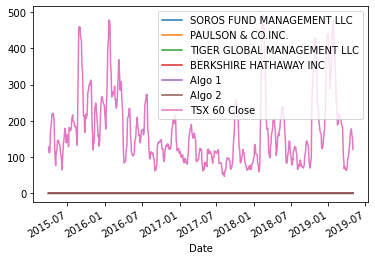

In [28]:
# Plot a rolling 30-day mean of MSFT's closing prices
combined_df.rolling(window=21).std().plot()

In [29]:
# Calculate the correlation of all portfolios
price_correlation = combined_df.corr()

price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.065582
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.057284
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,-0.012292
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.067720
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,-0.054593
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.076330
TSX 60 Close,0.065582,0.057284,-0.012292,0.067720,-0.054593,0.076330,1.000000


In [30]:
# Use the `heatmap` function from the seaborn library to visualize correlations
#sns.heatmap(price_correlation, vmin=-1, vmax=1)

In [31]:
# Calculate covariance of all 
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['TSX 60 Close'])
covariance

3.7106899078552236e-05

In [32]:
# Calculate variance of the S&P 60
variance = daily_returns['TSX 60 Close'].var()
variance

4.405458170898365e-05

In [33]:
# Calculate beta of all daily returns of Soros
soros_beta = covariance / variance
soros_beta

0.8422937555887714

<Axes: title={'center': 'Rolling 60-Day Covariance of Soros vs. S&P 60 Returns'}, xlabel='Date'>

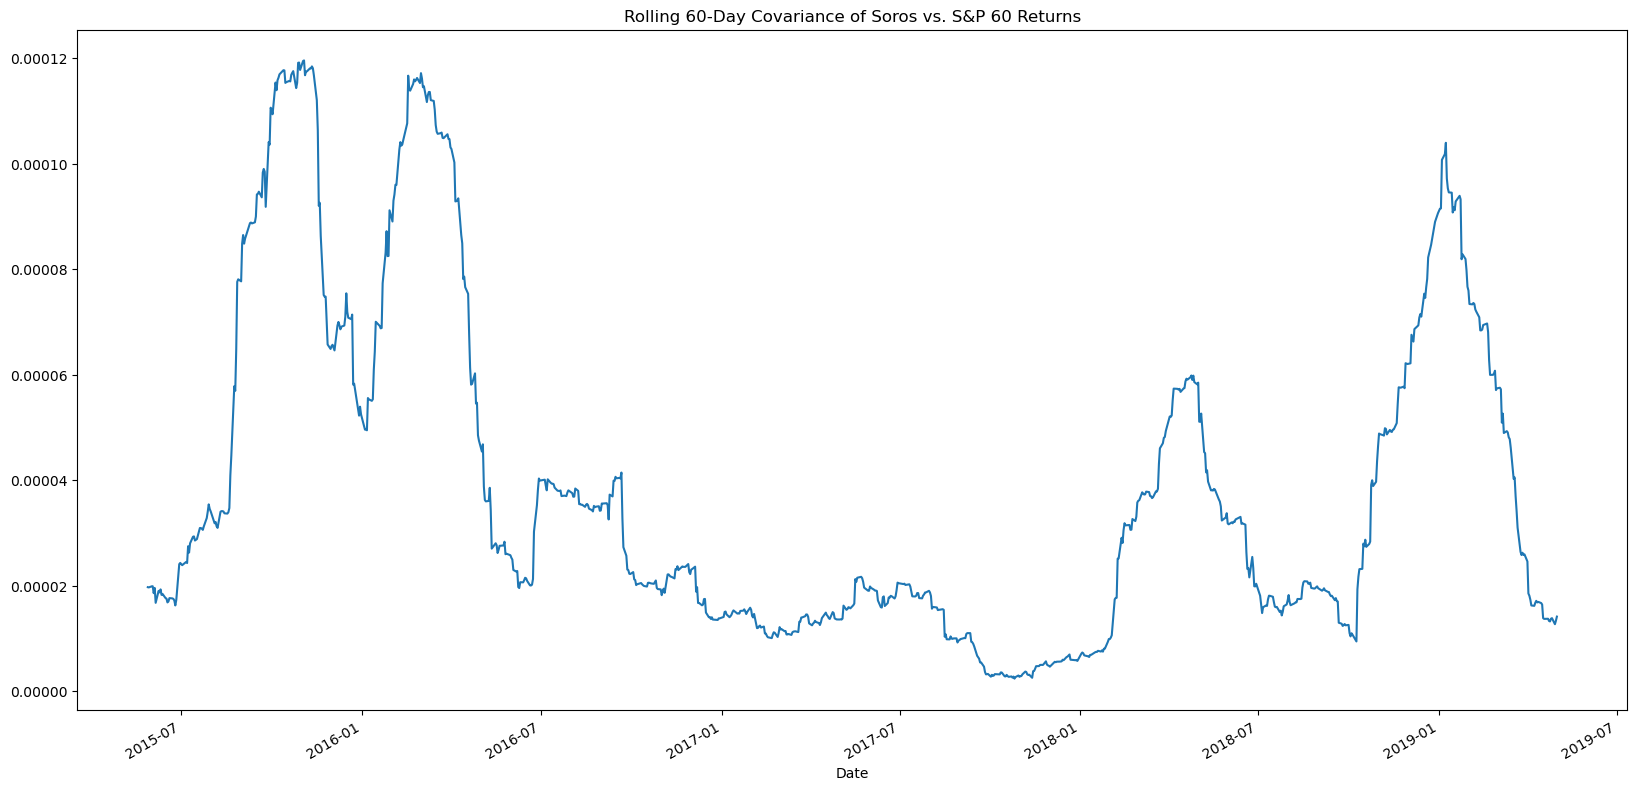

In [34]:
# Calculate 30-day rolling covariance of Soros vs. S&P 60 and plot the data
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['TSX 60 Close'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Soros vs. S&P 60 Returns')

In [35]:
 # Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60 Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


In [36]:
# Calculate Sharpe Ratio
#csvpath4 = Path(".csv")
#rf_rate_df = pd.read_csv(csvpath4, index_col = 'Date', parse_dates = True, infer_datetime_format=True)
sharpe_ratios = ((combined_df.mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX 60 Close                   0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

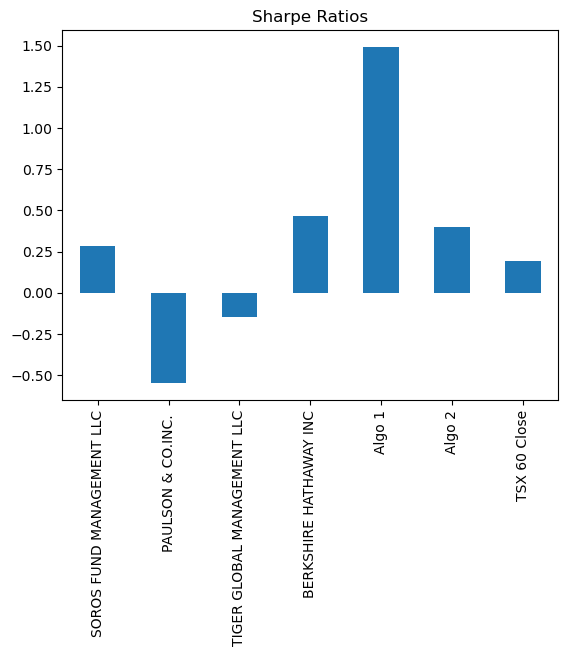

In [37]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [38]:
import os
from pathlib import Path


In [39]:
os.getcwd()

'C:\\Users\\UxmaS\\Downloads\\Fintech'

In [40]:
path = os.path.join(os.getcwd(),"HistoricalData_Microsoft.csv")

microsoft_df = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format=True)

microsoft_df['Close/Last'] = microsoft_df['Close/Last'].str.replace('$','', regex=True)
microsoft_df['Close/Last'] = microsoft_df['Close/Last'].astype('float')
microsoft_df['Open'] = microsoft_df['Open'].str.replace('$','', regex=True)
microsoft_df['Open'] = microsoft_df['Open'].astype('float')
microsoft_df['High'] = microsoft_df['High'].str.replace('$','', regex=True)
microsoft_df['High'] = microsoft_df['High'].astype('float')
microsoft_df['Low'] = microsoft_df['Low'].str.replace('$','', regex=True)
microsoft_df['Low'] = microsoft_df['Low'].astype('float')

microsoft_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-06-09,326.79,22528950,324.990,329.9900,324.4100
2023-06-08,325.26,23277710,323.935,326.6400,323.3500
2023-06-07,323.38,40717130,331.650,334.4900,322.5000
2023-06-06,333.68,20396220,335.330,335.3700,332.1700
2023-06-05,335.94,21307050,335.220,338.5599,334.6601


In [ ]:
# help(pd.read_csv)

In [41]:
# microsoft_df.columns

mc = [('MSFT','Close/Last'), ('MSFT','Volume'), ('MSFT','Open'), ('MSFT','High'), ('MSFT','Low')]

microsoft_df.columns=pd.MultiIndex.from_tuples(mc)

microsoft_df

MSFT                                       
           Close/Last    Volume     Open      High       Low
Date                                                        
2023-06-09     326.79  22528950  324.990  329.9900  324.4100
2023-06-08     325.26  23277710  323.935  326.6400  323.3500
2023-06-07     323.38  40717130  331.650  334.4900  322.5000
2023-06-06     333.68  20396220  335.330  335.3700  332.1700
2023-06-05     335.94  21307050  335.220  338.5599  334.6601
...               ...       ...      ...       ...       ...
2022-06-17     247.65  43084780  244.700  250.5000  244.0300
2022-06-16     244.97  33169160  245.980  247.4174  243.0200
2022-06-15     251.76  33111730  248.310  255.3000  246.4200
2022-06-14     244.49  28651490  243.860  245.7400  241.5100
2022-06-13     242.26  46135790  245.110  249.0242  241.5300

[250 rows x 5 columns]

In [42]:
path = os.path.join(os.getcwd(),"HistoricalData_Mastercard.csv")

mastercard_df = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format=True)

mastercard_df.head()

mastercard_df['Close/Last'] = mastercard_df['Close/Last'].str.replace('$','', regex=True)
mastercard_df['Close/Last'] = mastercard_df['Close/Last'].astype('float')
mastercard_df['Open'] = mastercard_df['Open'].str.replace('$','', regex=True)
mastercard_df['Open'] = mastercard_df['Open'].astype('float')
mastercard_df['High'] = mastercard_df['High'].str.replace('$','', regex=True)
mastercard_df['High'] = mastercard_df['High'].astype('float')
mastercard_df['Low'] = mastercard_df['Low'].str.replace('$','', regex=True)
mastercard_df['Low'] = mastercard_df['Low'].astype('float')

mac = [('MA','Close/Last'), ('MA','Volume'), ('MA','Open'), ('MA','High'), ('MA','Low')]

mastercard_df.columns=pd.MultiIndex.from_tuples(mac)

mastercard_df

MA                                    
           Close/Last   Volume    Open      High      Low
Date                                                     
2023-06-09     369.22  2202370  370.46  372.1050  367.760
2023-06-08     367.59  2595273  369.36  369.7700  365.845
2023-06-07     371.39  3714519  379.29  380.5000  368.260
2023-06-06     379.96  2758722  372.95  380.3800  371.805
2023-06-05     370.52  2316299  372.75  372.7950  368.530
...               ...      ...     ...       ...      ...
2022-06-17     310.69  6235394  307.00  314.1350  303.650
2022-06-16     308.78  4528529  316.09  316.4500  305.080
2022-06-15     325.39  2357895  327.41  330.6300  319.430
2022-06-14     322.14  2788401  320.10  323.9999  319.660
2022-06-13     319.74  4825094  322.00  330.9000  317.920

[250 rows x 5 columns]

In [43]:
path = os.path.join(os.getcwd(),"HistoricalData_Amazon.csv")

amazon_df = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format=True)

amazon_df.head()

amazon_df['Close/Last'] = amazon_df['Close/Last'].str.replace('$','', regex=True)
amazon_df['Close/Last'] = amazon_df['Close/Last'].astype('float')
amazon_df['Open'] = amazon_df['Open'].str.replace('$','', regex=True)
amazon_df['Open'] = amazon_df['Open'].astype('float')
amazon_df['High'] = amazon_df['High'].str.replace('$','', regex=True)
amazon_df['High'] = amazon_df['High'].astype('float')
amazon_df['Low'] = amazon_df['Low'].str.replace('$','', regex=True)
amazon_df['Low'] = amazon_df['Low'].astype('float')

ac = [('AMZN','Close/Last'), ('AMZN','Volume'), ('AMZN','Open'), ('AMZN','High'), ('AMZN','Low')]

amazon_df.columns=pd.MultiIndex.from_tuples(ac)

amazon_df

AMZN                                     
           Close/Last    Volume    Open     High       Low
Date                                                      
2023-06-09     123.43  51396020  124.08  125.800  123.1900
2023-06-08     124.25  62159270  123.01  125.625  122.2579
2023-06-07     121.23  95663280  127.01  127.365  120.6300
2023-06-06     126.61  45695210  125.07  127.400  125.0000
2023-06-05     125.30  47950130  123.36  125.800  123.0300
...               ...       ...     ...      ...       ...
2022-06-17     106.22  99772150  102.80  106.980  102.5100
2022-06-16     103.66  82186300  104.47  104.580  102.0100
2022-06-15     107.67  85011060  103.86  109.060  103.5300
2022-06-14     102.31  69728760  104.19  104.880  101.4300
2022-06-13     103.67  99277740  104.19  106.540  101.8600

[250 rows x 5 columns]

In [44]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_custom_df = pd.concat([microsoft_df, mastercard_df, amazon_df], axis="columns", join="inner")

combined_custom_df



MSFT                                                MA  \
           Close/Last    Volume     Open      High       Low Close/Last   
Date                                                                      
2023-06-09     326.79  22528950  324.990  329.9900  324.4100     369.22   
2023-06-08     325.26  23277710  323.935  326.6400  323.3500     367.59   
2023-06-07     323.38  40717130  331.650  334.4900  322.5000     371.39   
2023-06-06     333.68  20396220  335.330  335.3700  332.1700     379.96   
2023-06-05     335.94  21307050  335.220  338.5599  334.6601     370.52   
...               ...       ...      ...       ...       ...        ...   
2022-06-17     247.65  43084780  244.700  250.5000  244.0300     310.69   
2022-06-16     244.97  33169160  245.980  247.4174  243.0200     308.78   
2022-06-15     251.76  33111730  248.310  255.3000  246.4200     325.39   
2022-06-14     244.49  28651490  243.860  245.7400  241.5100     322.14   
2022-06-13     242.26  46135790  245.110  249.0242  241.5300     319.74   

                                                     AMZN                    \
             Volume    Open      High      Low Close/Last    Volume    Open   
Date                                                                          
2023-06-09  2202370  370.46  372.1050  367.760     123.43  51396020  124.08   
2023-06-08  2595273  369.36  369.7700  365.845     124.25  62159270  123.01   
2023-06-07  3714519  379.29  380.5000  368.260     121.23  95663280  127.01   
2023-06-06  2758722  372.95  380.3800  371.805     126.61  45695210  125.07   
2023-06-05  2316299  372.75  372.7950  368.530     125.30  47950130  123.36   
...             ...     ...       ...      ...        ...       ...     ...   
2022-06-17  6235394  307.00  314.1350  303.650     106.22  99772150  102.80   
2022-06-16  4528529  316.09  316.4500  305.080     103.66  82186300  104.47   
2022-06-15  2357895  327.41  330.6300  319.430     107.67  85011060  103.86   
2022-06-14  2788401  320.10  323.9999  319.660     102.31  69728760  104.19   
2022-06-13  4825094  322.00  330.9000  317.920     103.67  99277740  104.19   

                               
               High       Low  
Date                           
2023-06-09  125.800  123.1900  
2023-06-08  125.625  122.2579  
2023-06-07  127.365  120.6300  
2023-06-06  127.400  125.0000  
2023-06-05  125.800  123.0300  
...             ...       ...  
2022-06-17  106.980  102.5100  
2022-06-16  104.580  102.0100  
2022-06-15  109.060  103.5300  
2022-06-14  104.880  101.4300  
2022-06-13  106.540  101.8600  

[250 rows x 15 columns]

In [45]:
daily_returns_custom = combined_custom_df.pct_change()

daily_returns_custom.dropna(inplace=True)

daily_returns_custom

MSFT                                                 MA  \
           Close/Last    Volume      Open      High       Low Close/Last   
Date                                                                       
2023-06-08  -0.004682  0.033235 -0.003246 -0.010152 -0.003267  -0.004415   
2023-06-07  -0.005780  0.749190  0.023817  0.024033 -0.002629   0.010338   
2023-06-06   0.031851 -0.499075  0.011096  0.002631  0.029984   0.023075   
2023-06-05   0.006773  0.044657 -0.000328  0.009512  0.007496  -0.024845   
2023-06-02  -0.001607  0.214329 -0.002903 -0.003131 -0.006305   0.008663   
...               ...       ...       ...       ...       ...        ...   
2022-06-17  -0.024001  0.439600 -0.022197 -0.016683 -0.021963  -0.021141   
2022-06-16  -0.010822 -0.230142  0.005231 -0.012306 -0.004139  -0.006148   
2022-06-15   0.027718 -0.001731  0.009472  0.031860  0.013991   0.053792   
2022-06-14  -0.028877 -0.134703 -0.017921 -0.037446 -0.019925  -0.009988   
2022-06-13  -0.009121  0.610241  0.005126  0.013365  0.000083  -0.007450   

                                                         AMZN            \
              Volume      Open      High       Low Close/Last    Volume   
Date                                                                      
2023-06-08  0.178400 -0.002969 -0.006275 -0.005207   0.006643  0.209418   
2023-06-07  0.431263  0.026884  0.029018  0.006601  -0.024306  0.539003   
2023-06-06 -0.257314 -0.016715 -0.000315  0.009626   0.044378 -0.522333   
2023-06-05 -0.160372 -0.000536 -0.019941 -0.008808  -0.010347  0.049347   
2023-06-02  0.079938  0.004936  0.008114  0.009823  -0.008380  0.277669   
...              ...       ...       ...       ...        ...       ...   
2022-06-17  0.952324 -0.028635 -0.019033 -0.035664  -0.022635  0.407199   
2022-06-16 -0.273738  0.029609  0.007369  0.004709  -0.024101 -0.176260   
2022-06-15 -0.479324  0.035813  0.044810  0.047037   0.038684  0.034370   
2022-06-14  0.182581 -0.022327 -0.020053  0.000720  -0.049782 -0.179768   
2022-06-13  0.730416  0.005936  0.021297 -0.005443   0.013293  0.423770   

                                          
                Open      High       Low  
Date                                      
2023-06-08 -0.008623 -0.001391 -0.007566  
2023-06-07  0.032518  0.013851 -0.013315  
2023-06-06 -0.015274  0.000275  0.036226  
2023-06-05 -0.013672 -0.012559 -0.015760  
2023-06-02  0.012646  0.004690  0.008006  
...              ...       ...       ...  
2022-06-17 -0.049908 -0.041655 -0.010139  
2022-06-16  0.016245 -0.022434 -0.004878  
2022-06-15 -0.005839  0.042838  0.014900  
2022-06-14  0.003177 -0.038328 -0.020284  
2022-06-13  0.000000  0.015828  0.004239  

[249 rows x 15 columns]

In [47]:
custom_weights = [1/3, 1/3, 1/3]

# Use the `dot` function to multiply the weights by each stokc's daily return to get the portfolio daily return

# Convert multiindex df to single level df

daily_df = pd.DataFrame()

daily_df['MSFT Close Prices'] = daily_returns_custom['MSFT']['Close/Last']

daily_df['MA Close Prices'] = daily_returns_custom['MA']['Close/Last']

daily_df['AMZN Close Prices'] = daily_returns_custom['AMZN']['Close/Last']


daily_df
    
custom_portfolio_returns = daily_df.dot(custom_weights)
custom_portfolio_returns

Date
2023-06-08   -0.000818
2023-06-07   -0.006583
2023-06-06    0.033102
2023-06-05   -0.009473
2023-06-02   -0.000441
                ...   
2022-06-17   -0.022592
2022-06-16   -0.013690
2022-06-15    0.040065
2022-06-14   -0.029549
2022-06-13   -0.001093
Length: 249, dtype: float64

In [48]:
# Join custom and whale portfolio return
combined_port_df = pd.concat([portfolio_returns, custom_portfolio_returns], axis="columns", join="inner")

combined_port_df

,0,1
Date,,


In [ ]:
combined_port_df.dropna(inplace=True)

In [81]:
# Plot a rolling annualized std dev of all portfolio closing prices
annualized_df = combined_port_df.rolling(window=252).std()

<AxesSubplot:xlabel='Date'>

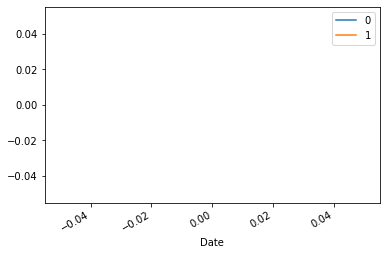

In [83]:
# Plot a rolling 21-day std of port closing prices
combined_port_df.rolling(window=21).std()

combined_port_df.rolling(window=21).std().plot()


In [ ]:
# Calculate the correlation of all portfolios
combined_correlation = combined_port_df.corr()

In [ ]:
# Calculate covariance of all 
covariance = combined_port_df.cov(combined_df['TSX 60 Close'])
covariance

In [ ]:
# Calculate variance of the S&P 60
variance = combined_custom_df.var()
variance

In [ ]:
# Calculate beta of all daily returns of custom
custom_beta = covariance / variance
custom_beta

In [84]:
sharpe_ratios_custom = ((combined_port_df.mean()) * 252) / (combined_port_df.std() * np.sqrt(252))
sharpe_ratios_custom

0   NaN
1   NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

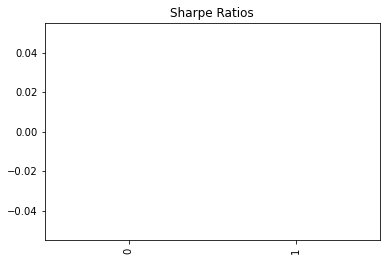

In [85]:
# Plot sharpe ratios
sharpe_ratios_custom.plot(kind="bar", title="Sharpe Ratios")